# Mid-Project

## Execise 1: Market-Based Valuation

- An at a prespecified price (strike) at a predetermined date (European option) or over a determined
    period of time (American option). Some options are settled in actual stocks; most options, like
    those on an index, are settled in cash. People or institutions selling options are called option
    writers. Those buying options are called option holders.

- For a European call option on an index with strike 8,000 and index level of 8,200
    at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or
    USD) from the option writer. If the index level is below the strike, say at 7,800, the option
    expires worthless and the writer does not have to pay anything. We can formalize this via
    the so-called inner value (or intrinsic value or payoff)—from the holder's viewpoint—of
    the option:
    
    $ h_T(S, K) = max[S_T − K, 0]$ 
    
    - where T is the maturity date of the option, $S_T$ the index level at this date and $K$ represents the
        strike price.
       
1. Compute the Inner value of a European call option on a stock index with strike of 8,000 dependent on the index level at maturity and plot this inner value function.

- Desired output:   
![call_inner_values](../data/02_mbv/call_inner_values.png)

2. What are the three scenarios that have to be distinguished with regard to the so-called moneyness of an option ? 
>    - in-the-money (ITM): An in the money call option is one that has a strike price lower than the current stock price, in our case it's when h_t > 0, in our case it's when S_t > 8000 .
>    - at-the-money (ATM): If an option strike price is the same as the current stock price, it's when S_t = 8000 .
>    - out-of-the-money (OTM): An out of the money call option is one that if the current stock price is lower than the strike price, it's when h_t = 0, in our case it's when S_t < 8000 .

3. What influences the present value of such a call option today? ([factors](https://www.investopedia.com/trading/factors-determine-option-pricing/))
Factors that influence a call option : 
Underlying Price & Strike Price : When the stock price goes up, calls should gain in value because you are able to buy the underlying asset at a lower price than where the market is.
Expiration Date : Time works in the stock trader's favor because good companies tend to rise over long periods of time. But time is the enemy of the buyer of the option because, if days pass without a significant change in the price of the underlying, the value of the option will decline.
Interest Rate : Call option and put option premiums are impacted inversely as interest rates change: calls benefit from rising rates while puts lose value. The opposite is true when interest rates fall. 


4. Compute and plot the Black-Scholes-Merton formula.

- Input:

These heuristic insights are formalized in the seminal work of Black-Scholes-Merton (cf. Black and Scholes (1973) and Merton (1973)) who for the first time derived a closed option pricing formula for a parsimonious set of input parameters. Their formula says mainly the following:

$C_0^∗ = C^{BSM}(S_0 , K, T, r, \sigma)$ ([BSM_option_valuation](https://www.investopedia.com/terms/b/blackscholes.asp))

In words, the fair present value of a European call option $C_0^∗$ is given by their formula $C^{BSM}(\cdot)$ which takes as input parameters:
    
- $S_0$ the current index level
- $K$ the strike price of the option
- $T$ the maturity date (equals time-to-maturity viewed from the present date)
- $r$ the constant risk-less short rate
- $\sigma$ the volatility of the index, i.e. the standard deviation of the index level returns


- Desired output:   
 ![BSM_call_value](../data/02_mbv/call_values.png)


### Question 1 :

In [7]:
import numpy as np
S_t = np.linspace(7000,9000,9,dtype = int)
S_t

array([7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000])

In [8]:
def inner_value(S_t,K):
    if(S_t >= K):
        return S_t - K
    return 0
h_t = [inner_value(x,K = 8000) for x in S_t ]
h_t

[0, 0, 0, 0, 0, 250, 500, 750, 1000]

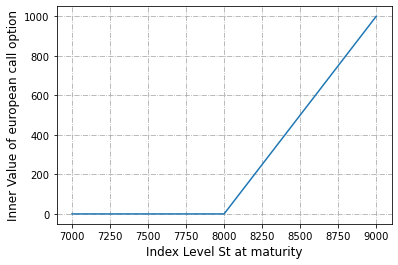

In [10]:
import matplotlib.pyplot as plt
x = S_t
y = h_t
plt.plot(x,y)
plt.xlabel('Index Level St at maturity',size=12)
plt.ylabel('Inner Value of european call option',size=12)
plt.grid(True,linewidth=0.80,color='#aaaaaa',linestyle='dashdot')

### Question 2 :

in-the-money (ITM): An in the money call option is one that has a strike price lower than the current stock price, in our case it's when h_t > 0, in our case it's when S_t > 8000 .

at-the-money (ATM): If an option strike price is the same as the current stock price, it's when S_t = 8000 .

out-of-the-money (OTM): An out of the money call option is one that if the current stock price is lower than the strike price, it's when h_t = 0, in our case it's when S_t < 8000 .



### Question 3 :

Factors that influence a call option : 
Underlying Price & Strike Price : When the stock price goes up, calls should gain in value because you are able to buy the underlying asset at a lower price than where the market is.
Expiration Date : Time works in the stock trader's favor because good companies tend to rise over long periods of time. But time is the enemy of the buyer of the option because, if days pass without a significant change in the price of the underlying, the value of the option will decline.
Interest Rate : Call option and put option premiums are impacted inversely as interest rates change: calls benefit from rising rates while puts lose value. The opposite is true when interest rates fall. 


### Question 4 :

In [11]:
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf

def euro_vanilla_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

In [17]:
S0 = np.linspace(4000,12000,9,dtype = int)
S0

array([ 4000,  5000,  6000,  7000,  8000,  9000, 10000, 11000, 12000])

In [18]:
h_t = [euro_vanilla_call(x,K = 8000,T = 1.0 ,r = 0.025 ,sigma = 0.2) for x in S0 ]
h_t

[0.12118799686919024,
 5.661005299381884,
 60.33671923757595,
 272.6612168928341,
 733.0328880869183,
 1430.726639649496,
 2288.325862765443,
 3229.883133807466,
 4208.298555359951]

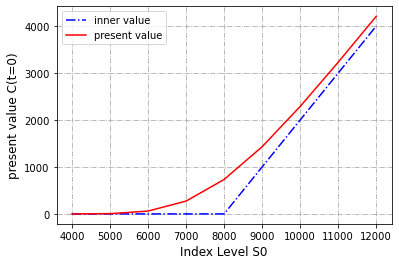

In [20]:
import matplotlib.pyplot as plt

x = S0
y1 = [inner_value(x,K = 8000) for x in S0 ]
y2 = [euro_vanilla_call(x,K = 8000,T = 1.0 ,r = 0.025 ,sigma = 0.2) for x in S0 ]
plt.plot(x,y1,color='blue', linestyle='dashdot',label = 'inner value')
plt.plot(x,y2,color='red',label = 'present value')
plt.xlabel('Index Level S0',size=12)
plt.ylabel('present value C(t=0)',size=12)
plt.grid(True,linewidth=0.80,color='#aaaaaa',linestyle='dashdot')
plt.legend(loc = "upper left")

## Exercise 2: MonteCarlo Simulation

- Implement all models included on the pdf file [MonteCarlo](../data/MonteCarlo.pdf)

In [26]:
pip install CIR_zcb_valuation

ERROR: Could not find a version that satisfies the requirement CIR_zcb_valuation (from versions: none)
ERROR: No matching distribution found for CIR_zcb_valuation
Note: you may need to restart the kernel to use updated packages.


In [21]:
#
# Valuation of Zero-Coupon Bonds
# in Cox-Ingersoll-Ross (1985) Model
# 09_gmm/CIR_zcb_valuation.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import math
import numpy as np
#
# Example Parameters CIR85 Model
#
kappa_r, theta_r, sigma_r, r0, T = 0.3, 0.04, 0.1, 0.04, 1.0
#
# Zero-Coupon Bond Valuation Formula

In [24]:
def gamma(kappa_r, sigma_r):
    return math.sqrt(kappa_r ** 2 + 2 * sigma_r ** 2)
def b1(alpha):
    kappa_r, theta_r, sigma_r, r0, T = alpha
    g = gamma(kappa_r, sigma_r)
    return (((2*g* math.exp((kappa_r + g) * T / 2)) /(2 * g + (kappa_r + g) * (math.exp(g * T) - 1)))** (2 * kappa_r * theta_r / sigma_r ** 2))
def b2(alpha):
    kappa_r, theta_r, sigma_r, r0, T = alpha
    g = gamma(kappa_r, sigma_r)
    return ((2 * (math.exp(g * T) - 1)) /(2 * g + (kappa_r + g) * (math.exp(g * T) - 1)))
def B(alpha):
    b_1 = b1(alpha)
    b_2 = b2(alpha)
    kappa_r, theta_r, sigma_r, r0, T = alpha
    return b_1 * math.exp(-b_2 * r0)
''' Function to value unit zero-coupon bonds in Cox-Ingersoll-Ross (1985)
model.
Parameters
==========
r0: float
initial short rate
kappa_r: float
mean-reversion factor
theta_r: float
long-run mean of short rate
sigma_r: float
volatility of short rate
T: float
time horizon/interval
Returns
=======
zcb_value: float
zero-coupon bond present value
'''

' Function to value unit zero-coupon bonds in Cox-Ingersoll-Ross (1985)\nmodel.\nParameters\n==========\nr0: float\ninitial short rate\nkappa_r: float\nmean-reversion factor\ntheta_r: float\nlong-run mean of short rate\nsigma_r: float\nvolatility of short rate\nT: float\ntime horizon/interval\nReturns\n=======\nzcb_value: float\nzero-coupon bond present value\n'

In [27]:
#
# Valuation of European Call and Put Options
# Under Stochastic Volatility and Jumps
# 09_gmm/BCC_option_valuation.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
import numpy as np
from scipy.integrate import quad
from CIR_zcb_valuation import B
import warnings
warnings.simplefilter('ignore')
#
# Example Parameters B96 Model
#
## H93 Parameters
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.15
rho = 0.1
v0 = 0.01
## M76 Parameters
lamb = 0.25
mu = -0.2
delta = 0.1
sigma = np.sqrt(v0)
## General Parameters
S0 = 100.0
K = 100.0
T = 1.0
r = 0.05
#
# Valuation by Integration
#
def BCC_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0,lamb, mu, delta):
    int_value = quad(lambda u: BCC_int_func(u, S0, K, T, r, kappa_v, theta_v,sigma_v, rho, v0, lamb, mu, delta), 0, np.inf, limit=250)[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K)/ np.pi * int_value)
    return call_value
''' Valuation of European call option in B96 Model via Lewis (2001)
Fourier-based approach.
Parameters
==========
S0: float
initial stock/index level
K: float
strike price
T: float
time-to-maturity (for t=0)
r: float
constant risk-free short rate
kappa_v: float
mean-reversion factor
theta_v: float
long-run mean of variance
sigma_v: float
volatility of variance
rho: float
correlation between variance and stock/index level
v0: float
initial level of variance
lamb: float
jump intensity
mu: float
expected jump size
delta: float
standard deviation of jump
Returns
=======
call_value: float
present value of European call option
'''

ModuleNotFoundError: No module named 'CIR_zcb_valuation'

In [28]:
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    int_value = quad(lambda u: H93_int_func(u, S0, K, T, r, kappa_v,theta_v, sigma_v, rho, v0), 0, np.inf, limit=250)[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K)/ np.pi * int_value)
    return call_value
def M76_call_value(S0, K, T, r, v0, lamb, mu, delta):
    sigma = np.sqrt(v0)
    int_value = quad(lambda u: M76_int_func_sa(u, S0, K, T, r,sigma, lamb, mu, delta), 0, np.inf, limit=250)[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K)/ np.pi * int_value)
    return call_value
#
# Integration Functions
#
def BCC_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0,lamb, mu, delta):
    char_func_value = BCC_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v,sigma_v, rho, v0, lamb, mu, delta)
    int_func_value = 1 / (u ** 2 + 0.25) \* (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    return int_func_value
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    char_func_value = H93_char_func(u - 1j * 0.5, T, r, kappa_v,theta_v, sigma_v, rho, v0)
    int_func_value = 1 / (u ** 2 + 0.25) \* (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    return int_func_value
def M76_int_func_sa(u, S0, K, T, r, sigma, lamb, mu, delta):
    char_func_value = M76_char_func_sa(u - 0.5 * 1j, T, r, sigma,lamb, mu, delta)
    int_func_value = 1 / (u ** 2 + 0.25) \* (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    return int_func_value
#
# Characteristic Functions
#
def BCC_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0,lamb, mu, delta):
    BCC1 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    BCC2 = M76_char_func(u, T, lamb, mu, delta)
    return BCC1 * BCC2
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v)** 2 - sigma_v ** 2 * (-u * 1j - u ** 2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) \ / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = (r * u * 1j * T + (c1 / sigma_v ** 2)* ((kappa_v - rho * sigma_v * u * 1j + c2) * T- 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))))
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v ** 2* ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))))
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value
def M76_char_func(u, T, lamb, mu, delta):
    omega = -lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
    char_func_value = np.exp((1j * u * omega + lamb* (np.exp(1j * u * mu - u ** 2 * delta ** 2 * 0.5) - 1)) * T)
    return char_func_value
def M76_char_func_sa(u, T, r, sigma, lamb, mu, delta):
    omega = r - 0.5 * sigma ** 2 - lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
    char_func_value = np.exp((1j * u * omega - 0.5 * u ** 2 * sigma ** 2+ lamb * (np.exp(1j * u * mu - u ** 2 * delta ** 2 * 0.5)- 1)) * T)
    return char_func_value

SyntaxError: unexpected character after line continuation character (<ipython-input-28-aa39ddd187ef>, line 15)